# Test code to test out certain parts of original code

In [31]:
from qiskit import QuantumCircuit, ClassicalRegister
import qiskit
import random
import numpy as np
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import random_statevector
from transformation_matrix_approximation import *
import pennylane as qml

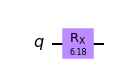

In [29]:
qc_original = QuantumCircuit(1)
angle = random.uniform(np.pi*1.75, np.pi*2)
qc_original.rx(angle,0)
qc_original.draw('mpl')

0.001218467889552488


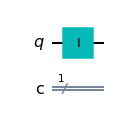

In [30]:
dist, qc_new = transform_qc(qc_original)
print(dist)
qc_new.draw('mpl')

In [39]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def circuit(params):
    print(params)
    qml.Rot(*params, wires=0)
    return qml.expval(qml.PauliZ(0))

circuit.construct([[0.1, 0.2, 0.3]], {})
t = circuit.qtape.to_openqasm()
print(t)

[0.1, 0.2, 0.3]
OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
creg c[1];
rz(0.1) q[0];
ry(0.2) q[0];
rz(0.3) q[0];
measure q[0] -> c[0];

